# Student Alcohol Consumption



### Introduction and motivavtion

The objective of this project is to unveal the trends that foresee a dataset which its central topic is alcohol consumption in students. Despite being a controversial topic, this is a real problem that many people are facing nowadays and shading some light on it might display some trends that can be helpful for improving student's health.

We're going to look closely at a dataset from high school students in Portugal. This dataset has lots of interesting details about the students' social lives, whether they are boys or girls, and how they study.

## Project Index

### 1. Motivation
- Objectives and context of the project.
- Overview of the dataset: High school students in Portugal.

### 2. Initial Data Loading and Inspection
- Importing necessary libraries.
- Loading and displaying the first few rows of Math and Portuguese datasets.
- Checking for column consistency between datasets.
- Basic information and statistical summary of both datasets.

### 3. Handling Duplicates and Merging Datasets
- Identifying and addressing duplicate entries.
- Steps for merging Math and Portuguese course datasets.

### 4. Data Preprocessing
- Encoding categorical variables.
- Handling binary and nominal variables.
- Creating a DataFrame for visualization.

### 5. Exploratory Data Analysis
- Distribution plots for age, gender, and final grades.
- Bar plots and box plots for various student attributes.
- Correlation matrix for numerical variables.
- Pair plot with KDE for key variables.

### 6. Categorical Data Analysis
- Count plots for mother's job, father's job, reason for choosing school, guardian and more.

### 7. Statistical Analysis and Insights
- Proportions and average grades by gender.
- Violin plot for study time vs final grade.
- Combined box and strip plot for gender and final grades.

### 8. Visual Representations
- Heatmap of the correlation matrix.
- Pair plot for selected variables.
- Count plots for categorical variables.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


## Attributes from the dataset

Attributes for both `student-mat.csv` (Math course) and `student-por.csv` (Portuguese language course) datasets:

- **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- **sex** - student's sex (binary: 'F' - female or 'M' - male)
- **age** - student's age (numeric: from 15 to 22)
- **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup** - extra educational support (binary: yes or no)
- **famsup** - family educational support (binary: yes or no)
- **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **activities** - extra-curricular activities (binary: yes or no)
- **nursery** - attended nursery school (binary: yes or no)
- **higher** - wants to take higher education (binary: yes or no)
- **internet** - Internet access at home (binary: yes or no)
- **romantic** - with a romantic relationship (binary: yes or no)
- **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
- **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health** - current health status (numeric: from 1 - very bad to 5 - very good)
- **absences** - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:
- **G1** - first period grade (numeric: from 0 to 20)
- **G2** - second period grade (numeric: from 0 to 20)
- **G3** - final grade (numeric: from 0 to 20, output target)



# Hypotheses for Exploratory Data Analysis

1. **Educational Achievement and Parental Education**: 
   - Hypothesis: Students whose parents have higher education levels (`Medu`, `Fedu`) are more likely to achieve higher grades (`G1`, `G2`, `G3`).

2. **Impact of Family Structure on Academic Performance**: 
   - Hypothesis: Students from smaller families (`famsize` 'LE3') and those living with both parents (`Pstatus` 'T') might perform better academically due to potentially more resources and attention.

3. **Influence of Travel Time on Study Time and Grades**: 
   - Hypothesis: Longer travel times (`traveltime`) to school might negatively impact students’ study time (`studytime`) and thus their grades.

4. **Effect of Alcohol Consumption on Academic Performance**: 
   - Hypothesis: Higher alcohol consumption (`Dalc`, `Walc`) might correlate with lower grades, reflecting the negative impact of alcohol on academic performance.

5. **Role of Extracurricular Activities and Free Time**: 
   - Hypothesis: Students involved in extracurricular activities (`activities` 'yes') and those with balanced free time (`freetime`) may have better overall grades, suggesting a positive impact of a well-rounded lifestyle.

6. **Internet Access and Educational Support**: 
   - Hypothesis: Students with internet access at home (`internet` 'yes') and those receiving extra educational support (`schoolsup` 'yes') might show better academic results due to enhanced learning opportunities.







In [4]:
df1 = pd.read_csv('student-mat.csv')

# Display the first few rows of the dataset
print(df1.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [5]:
df2 = pd.read_csv('student-mat.csv')

# Display the first few rows of the dataset
print(df2.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [6]:
# Check if columns are the same and print a message
if (df1.columns == df2.columns).all():
    print("The columns are the same.")
else:
    print("The columns are different.")


The columns are the same.


In [7]:
# Basic information and summary
print("\nMath Dataset Info and Description:")
print(df1.info())
print(df1.describe())

print("\nPortuguese Dataset Info and Description:")
print(df2.info())
print(df2.describe())



Math Dataset Info and Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     39

In [8]:

# Check for missing values in both datasets
print("\nMissing values in Math Dataset:")
print(df1.isnull().sum())

print("\nMissing values in Portuguese Dataset:")
print(df2.isnull().sum())


Missing values in Math Dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Missing values in Portuguese Dataset:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
fre

In [9]:
# Compare sample values in key columns like 'G3'
print("\nSample values for 'G3' in Math dataset:")
print(df1['G3'].head())

print("Sample values for 'G3' in Portuguese dataset:")
print(df2['G3'].head())

# Compare statistical summaries for 'G3'
print("\nStatistical summary for 'G3' in Math dataset:")
print(df1['G3'].describe())

print("Statistical summary for 'G3' in Portuguese dataset:")
print(df2['G3'].describe())


Sample values for 'G3' in Math dataset:
0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64
Sample values for 'G3' in Portuguese dataset:
0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

Statistical summary for 'G3' in Math dataset:
count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64
Statistical summary for 'G3' in Portuguese dataset:
count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


### Sample Values: 
The first few values of the 'G3' column in both datasets are identical, which suggests that they are likely measured on the same scale and represent the same concept.
### Statistical Summary:
Count: There are 395 entries in both datasets.
Mean: The average final grade is approximately 10.42 in both datasets.
Standard Deviation: The standard deviation is about 4.58, indicating a similar spread or variance in final grades in both subjects.
Minimum and Maximum Values: The range of grades (0 to 20) is the same in both datasets.
Quartiles: The 25th, 50th (median), and 75th percentile values are also the same, indicating a similar distribution of grades.

In [10]:
# List of categorical columns
categorical_columns = ['Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'nursery' , 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Function to compare categories in a column between two dataframes
def compare_categories(column_name):
    categories_df1 = set(df1[column_name].unique())
    categories_df2 = set(df2[column_name].unique())

    if categories_df1 == categories_df2:
        print(f"Column '{column_name}' is consistent across both datasets.")
    else:
        print(f"Column '{column_name}' is inconsistent.")
        print("Math dataset categories:", categories_df1)
        print("Portuguese dataset categories:", categories_df2)

# Compare categories for each categorical column
for col in categorical_columns:
    compare_categories(col)


Column 'Mjob' is consistent across both datasets.
Column 'Fjob' is consistent across both datasets.
Column 'reason' is consistent across both datasets.
Column 'guardian' is consistent across both datasets.
Column 'schoolsup' is consistent across both datasets.
Column 'nursery' is consistent across both datasets.
Column 'famsup' is consistent across both datasets.
Column 'paid' is consistent across both datasets.
Column 'activities' is consistent across both datasets.
Column 'nursery' is consistent across both datasets.
Column 'higher' is consistent across both datasets.
Column 'internet' is consistent across both datasets.
Column 'romantic' is consistent across both datasets.


## Merging and Processing Student Data from Math and Portuguese Courses

In order to merge the dfs, we have to handle that there are several students that do both classes.

### Steps Taken:

1. **Subject Columns Addition**: 
   - Added 'Math' and 'Portuguese' columns to each dataset as binary flags (1 for enrolled, 0 for not enrolled).

2. **Concatenating Datasets**:
   - Combined both datasets into a single dataframe, `df`, which includes potential duplicates for students in both courses.

3. **Identifying and Merging Duplicates**:
   - Identified duplicate student records based on key attributes and merged them. Ensured that students enrolled in both courses are correctly marked in 'Math' and 'Portuguese' columns.

4. **Final Dataset Preparation**:
   - Employed `groupby` and `agg` for merging duplicate records. The final dataset `df` now accurately represents each student's enrollment in Math, Portuguese, or both courses.


Given the fact that we have already checked if both dfs were compatible, we proceed to concatenatenate them

In [11]:
import pandas as pd

# Add 'Math' and 'Portuguese' columns to indicate the subjects
df1['Math'] = 1
df1['Portuguese'] = 0
df2['Math'] = 0
df2['Portuguese'] = 1

# Concatenate datasets
df = pd.concat([df1, df2], ignore_index=True)

# Define columns that uniquely identify a student plus additional non-aggregated columns
identifying_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 
                       'activities', 'nursery', 'higher', 'internet', 'romantic', 'Mjob', 'Fjob', 'reason', 'guardian', 'age', 'Dalc', 'Walc', 'health', 'absences']

# Count the duplicates based on identifying columns
duplicate_count = df.duplicated(subset=identifying_columns).sum()
print("Number of duplicate entries before grouping: ", duplicate_count)


Number of duplicate entries before grouping:  396


In [12]:
# Group by identifying columns and sum the 'Math' and 'Portuguese' columns
df = df.groupby(identifying_columns, as_index=False).agg({
    'Math': 'max', 
    'Portuguese': 'max',
    'G1': 'mean',  # Average grade for the first period
    'G2': 'mean',  # Average grade for the second period
    'G3': 'mean',   # Average final grade
     # Binary columns
    'schoolsup': 'max',  # Example for binary columns
    'famsup': 'max',
    'paid': 'max',
    'activities': 'max',
    'nursery': 'max',
    'higher': 'max',
    'internet': 'max',
    'romantic': 'max',
    # Numerical or other types of columns
    'Medu': 'max', 
    'Fedu': 'max',
    'traveltime': 'mean',
    'studytime': 'mean',
    'failures': 'mean',  # Include this column
    'famrel': 'mean',    # Include this column
    'freetime': 'mean',  # Include this column
    'goout': 'mean',     # Include this column
})
# Check the first few rows of the modified dataset
print(df.head())

  school sex address famsize Pstatus      Mjob      Fjob      reason guardian  \
0     GP   F       R     GT3       A     other  services        home   mother   
1     GP   F       R     GT3       A  services   at_home        home    other   
2     GP   F       R     GT3       A     other     other        home   mother   
3     GP   F       R     GT3       T     other     other  reputation    other   
4     GP   F       R     GT3       T   at_home     other      course   mother   

   age  ...  internet  romantic  Medu  Fedu  traveltime  studytime  failures  \
0   18  ...       yes       yes     3     2         2.0        2.0       0.0   
1   19  ...        no        no     3     1         1.0        3.0       1.0   
2   17  ...       yes        no     3     2         1.0        2.0       0.0   
3   19  ...       yes       yes     2     3         1.0        3.0       1.0   
4   18  ...        no        no     2     2         2.0        4.0       0.0   

   famrel  freetime goout  
0   

In [13]:
# Check for duplicated entries based on identifying columns
duplicates = df[df.duplicated(subset=identifying_columns, keep=False)]

# Display the duplicated entries, if any
print(duplicates)

# Ensure that the number of duplicates is zero
print("Number of duplicate entries: ", len(duplicates))


Empty DataFrame
Columns: [school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, age, Dalc, Walc, health, absences, Math, Portuguese, G1, G2, G3, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout]
Index: []

[0 rows x 35 columns]
Number of duplicate entries:  0


## Encoding Categorical Variables

In [14]:
import pandas as pd

# Encoding binary categorical variables
binary_variables = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 
                     'activities', 'nursery', 'higher', 'internet', 'romantic' ]


# Mapping binary variables to numerical values
binary_mappings = {
    'school': {'GP': 1, 'MS': 0},
    'sex': {'F': 0, 'M': 1},
    'address': {'U': 1, 'R': 0},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'T': 1, 'A': 0},
    'schoolsup': {'yes': 1, 'no': 0},
    'famsup': {'yes': 1, 'no': 0},
    'paid': {'yes': 1, 'no': 0},
    'activities': {'yes': 1, 'no': 0},
    'nursery': {'yes': 1, 'no': 0},
    'higher': {'yes': 1, 'no': 0},
    'internet': {'yes': 1, 'no': 0},
    'romantic': {'yes': 1, 'no': 0},

}

for column in binary_variables:
    df[column] = df[column].map(binary_mappings[column])

# Encoding nominal categorical variables using get_dummies (one-hot encoding)
nominal_variables = ['Mjob', 'Fjob', 'reason', 'guardian']

df_encoded = pd.get_dummies(df, columns=nominal_variables)

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'bool':
        df_encoded[column] = df_encoded[column].astype(int)


# Display first few rows of the encoded DataFrame
print(df_encoded.head())

   school  sex  address  famsize  Pstatus  age  Dalc  Walc  health  absences  \
0       1    0        0        1        0   18     1     1       5        75   
1       1    0        0        1        0   19     1     2       5        12   
2       1    0        0        1        0   17     2     3       2         4   
3       1    0        0        1        1   19     1     1       3        40   
4       1    0        0        1        1   18     1     1       4         0   

   ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  reason_home  \
0  ...           0              1             0              0            1   
1  ...           0              0             0              0            1   
2  ...           1              0             0              0            1   
3  ...           1              0             0              0            0   
4  ...           1              0             0              1            0   

   reason_other  reason_reputation  guardian

In [15]:
# Print column names of the DataFrame
print(df.columns)


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'age', 'Dalc', 'Walc', 'health', 'absences',
       'Math', 'Portuguese', 'G1', 'G2', 'G3', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
       'goout'],
      dtype='object')


In [16]:
print(df_encoded.columns)


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'age', 'Dalc', 'Walc',
       'health', 'absences', 'Math', 'Portuguese', 'G1', 'G2', 'G3',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other'],
      dtype='object')


In [17]:
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             394 non-null    int64  
 1   sex                394 non-null    int64  
 2   address            394 non-null    int64  
 3   famsize            394 non-null    int64  
 4   Pstatus            394 non-null    int64  
 5   age                394 non-null    int64  
 6   Dalc               394 non-null    int64  
 7   Walc               394 non-null    int64  
 8   health             394 non-null    int64  
 9   absences           394 non-null    int64  
 10  Math               394 non-null    int64  
 11  Portuguese         394 non-null    int64  
 12  G1                 394 non-null    float64
 13  G2                 394 non-null    float64
 14  G3                 394 non-null    float64
 15  schoolsup          394 non-null    int64  
 16  famsup             394 non

# Visual representation of the data

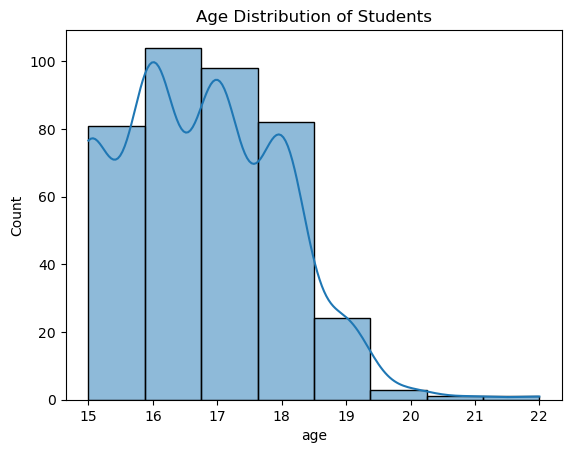

In [18]:
sns.histplot(data=df_encoded, x='age', bins=8, kde=True)
plt.title('Age Distribution of Students')
plt.show()


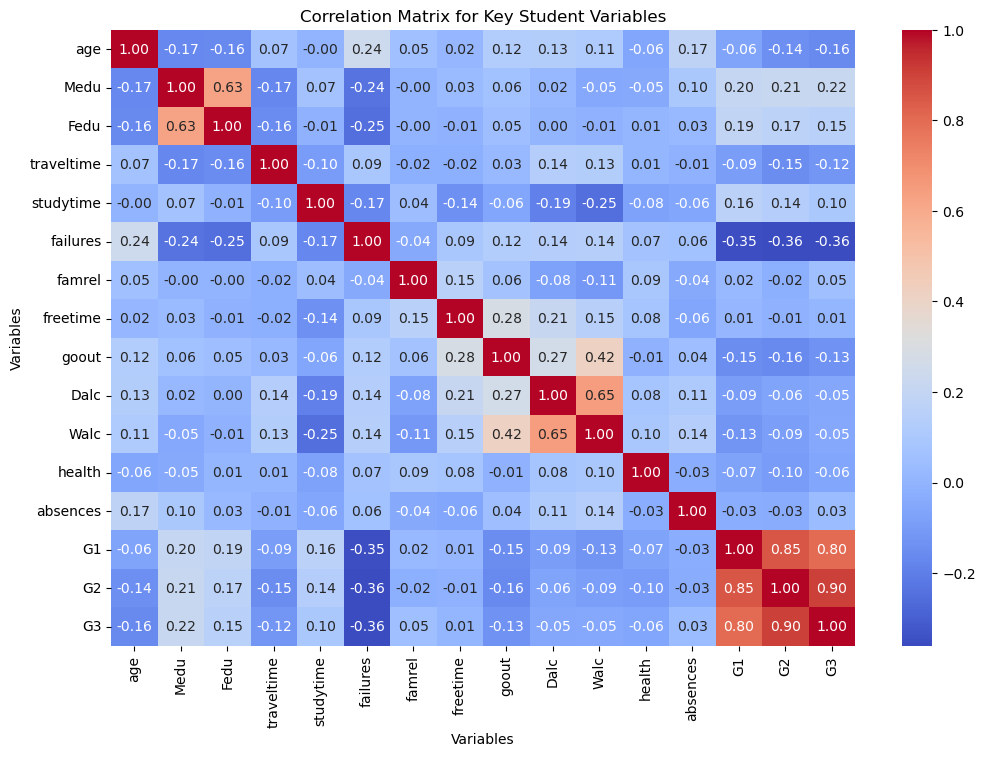

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns that you want to analyze
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 
                  'failures', 'famrel', 'freetime', 'goout', 
                  'Dalc', 'Walc', 'health', 'absences', 
                  'G1', 'G2', 'G3']

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adding titles and labels for clarity
plt.title('Correlation Matrix for Key Student Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


## Five Most Relevant Correlations:
1. **Weekend and Weekday Alcohol Consumption (Walc and Dalc)**: 0.647235
2. **Mother's and Father's Education (Medu and Fedu)**: 0.627671
3. **Final Grades Consistency (G1, G2, G3)**: All above 0.8, indicating strong consistency in student performance across different periods.
4. **Past Failures and Final Grades (G3 and failures)**: -0.360853, indicating a strong negative correlation where more past failures are associated with lower final grades.
5. **Study Time and Weekend Alcohol Consumption (studytime and Walc)**: -0.251597, suggesting that more study time is associated with less weekend alcohol consumption.

### Additional Relevant Correlations:
6. **Travel Time and Final Grades (traveltime and G3)**: -0.117568, indicating that longer travel times to school are mildly correlated with lower final grades.
7. **Parental Coexistence and Family Relationship Quality (Pstatus and famrel)**: Although not quantitatively strong, the relationship between parents' cohabitation status and the quality of family relationships can be an interesting area for further exploration.


## Box Plot for Final Grade Distribution by Address Type

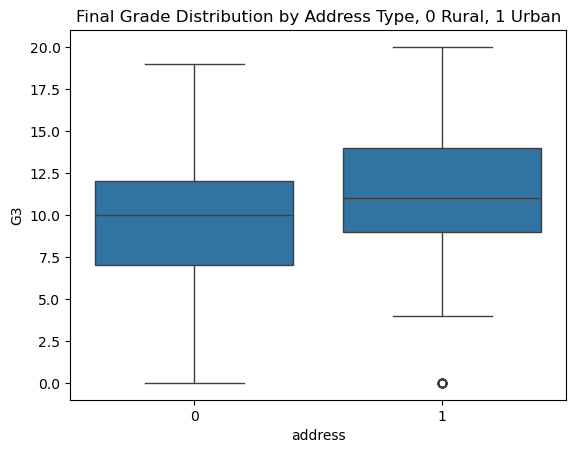

In [20]:
sns.boxplot(x='address', y='G3', data=df_encoded)
plt.title('Final Grade Distribution by Address Type, 0 Rural, 1 Urban')
plt.show()


### 1.Comment Rural/Urban vs G3: 
The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). In other words, it shows where the middle 50% of the data lies. The length of the box indicates the spread of this middle 50% of the data.
The mean on the Urban is slightly higher and also there is more students on the upper quartile that get better grades, oposed to the rural ones. On the other hand, there is presence of outliers on the Urban. Not very significant, because is similar to the 1.5 times equivalency to the rural boxplot.

## Violin Plot and Replot for Study Time vs Final Grade

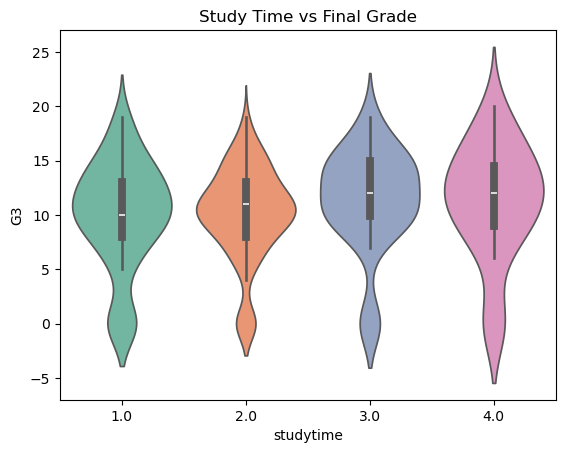

In [21]:
# Find the number of unique values in 'studytime'
unique_values = df_encoded['studytime'].nunique()

# Define a custom color palette with the exact number of needed colors
row_colors = sns.color_palette("Set2", n_colors=unique_values)

sns.violinplot(x='studytime', y='G3', data=df_encoded, palette=row_colors)
plt.title('Study Time vs Final Grade')
plt.show()

### 2.1 Comment studytime vs G3

As we can see the studytime 2 has a remarkable sharp belly, more separated the modes and therefore the mean is higher than the 1h. 
Overall shows a difuse trend that the more hours the better grade.


**Key Insights**:
The width of the plot at different grades shows the density of data points, indicating how common certain grades are for each level of study time.
It includes a box plot inside, showing the median and interquartile range, which helps identify the central tendency and spread of grades for each study time category.

**Best Use**:
Ideal for understanding the distribution and density of final grades for each study time category, especially useful for identifying multi-modality or skewness in the data.

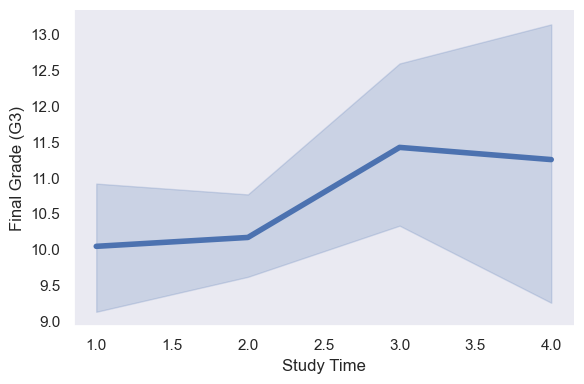

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="dark")

# Plotting the relationship between study time and final grades
g = sns.relplot(
    data=df,
    x="studytime", y="G3", 
    kind="line", linewidth=4, zorder=5,
    height=4, aspect=1.5
)

# Iterate over each subplot to customize further
for studytime, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.8, .85, f"Study Time {studytime}", transform=ax.transAxes, fontweight="bold")

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Study Time", "Final Grade (G3)")
g.tight_layout()

plt.show()


### 2.2 Comment studytime vs G3
The replot displays better the trend within studytimes. The highest slope is between 2 and 3 hours of study, getting stable after 3h.

**Key Insights**:
It shows the trend or direction of the relationship between study time and final grades, indicating whether more study time typically correlates with higher or lower grades.
The line plot can also indicate the strength of the relationship by the slope of the line.

**Best Use**: 
Best for identifying trends and general patterns in the data, such as whether an increase in study time tends to correlate with an increase or decrease in final grades.

## Boxplot & stripplot for Study Time vs Final Grade

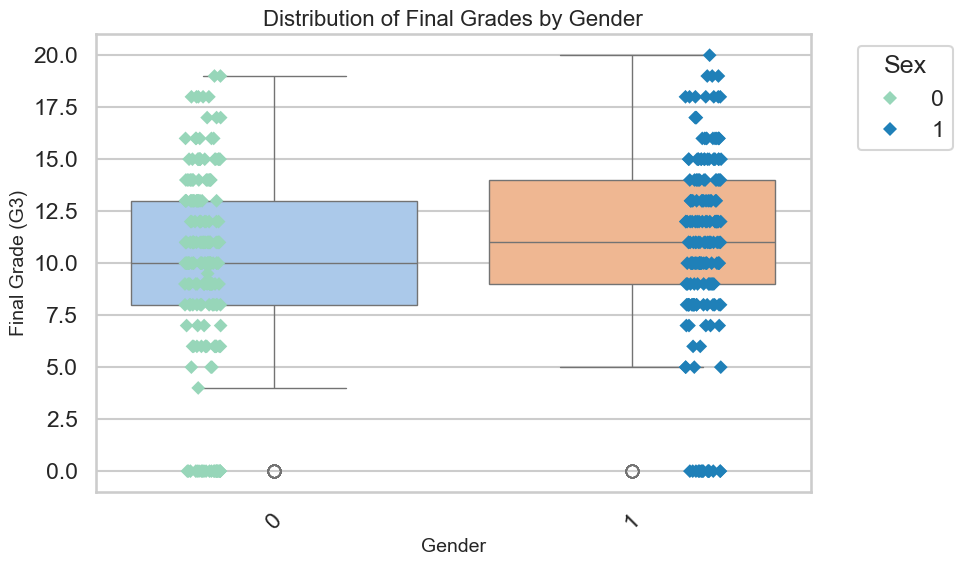

In [23]:
# Customize the plot style and context
sns.set(style="whitegrid", context="talk")

# Create a combined plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3', data=df_encoded, palette='pastel')
sns.stripplot(x='sex', y='G3', data=df_encoded, hue='sex', palette='YlGnBu', dodge=True, marker='D', size=7, jitter=True)

# Customize the plot aesthetics
plt.title('Distribution of Final Grades by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Final Grade (G3)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc=2)

# Show the plot
plt.tight_layout()
plt.show()


### 3. Comment Gender vs G3
No particular conclusions can be extracted form those, the barplot with the stripplot work well combined for seeing the distribution of the data and where are the quartiles. The Male data is slightly more spread out.


## Pair Plot KDE: studytime vs dalc vs walc vs G3

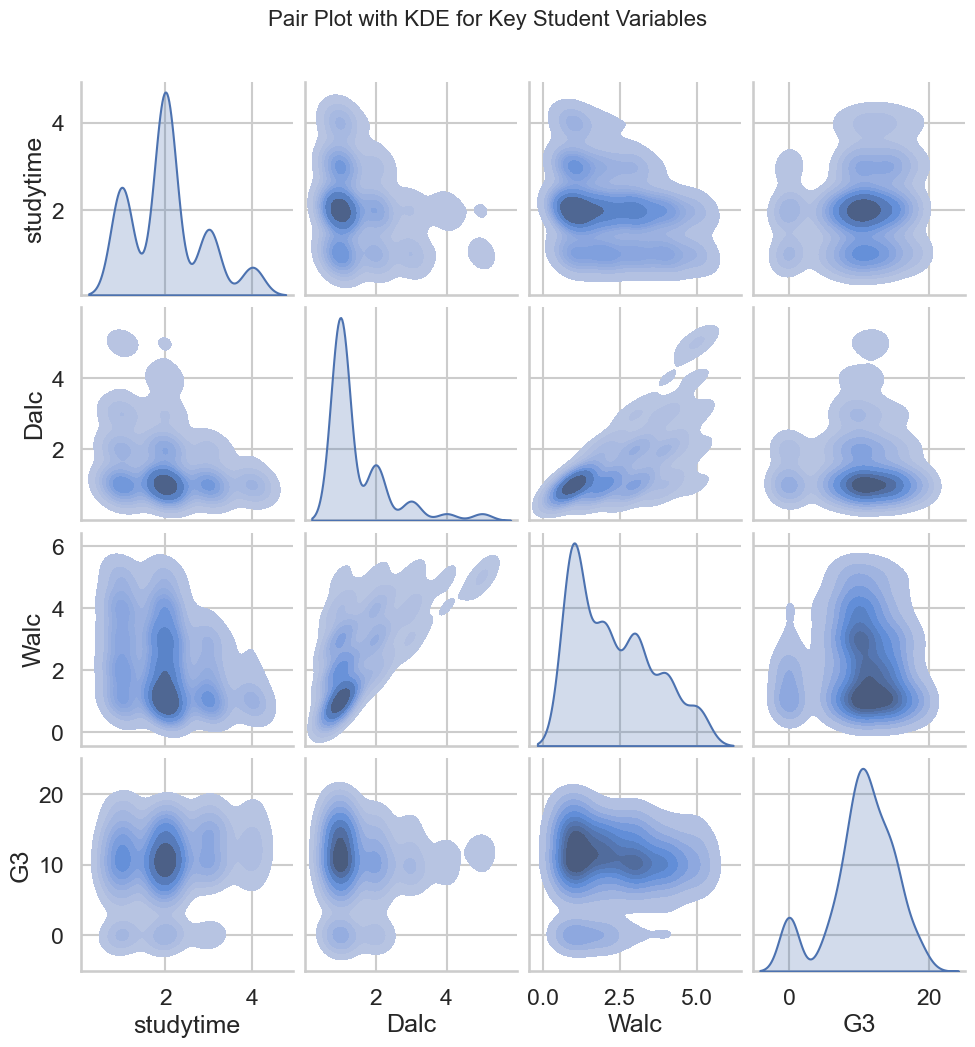

In [24]:

# Selecting a subset of variables for the pair plot
subset_vars = ['studytime', 'Dalc', 'Walc', 'G3']

# Create the pair plot with KDE plots
sns.pairplot(df[subset_vars], diag_kind='kde', kind='kde', plot_kws={'shade': True})

# Add a title to the plot
plt.suptitle('Pair Plot with KDE for Key Student Variables', size=16, y=1.05)


# Show the plot
plt.show()


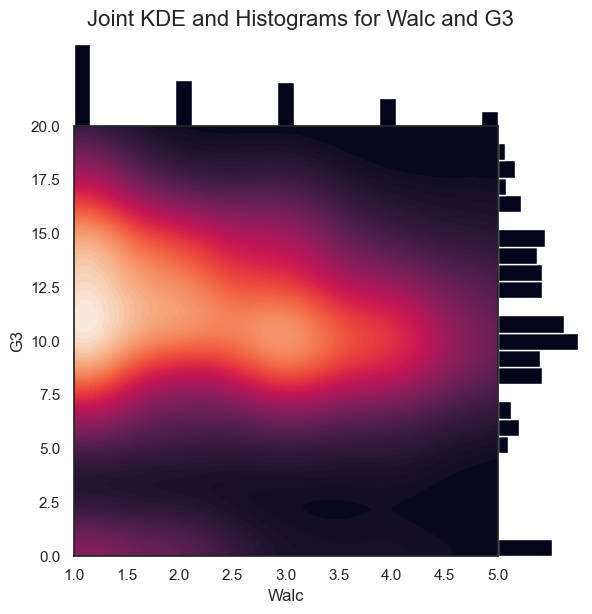

In [31]:

sns.set_theme(style="white")

# Create a JointGrid with 'Walc' and 'G3'
g = sns.JointGrid(data=df, x="Walc", y="G3", space=0)

# Plot a KDE on the joint plot
g.plot_joint(sns.kdeplot,
             fill=True, clip=((1, 5), (min(df['G3']), max(df['G3']))),  # Adjust the clip as needed
             thresh=0, levels=100, cmap="rocket")

# Plot histograms on the marginals
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

g.fig.suptitle('Joint KDE and Histograms for Walc and G3', size=16, y=1.02)

plt.show()


### 5. Comment studytime vs dalc vs walc vs G3
The pairplot displays that most of the students are arround 10 grade (sharp peek), with some outliers. Also the studytime reflects that the density is pretty spread across the average grade, being the most dense at the center where studytime is 2. Also is clearly displayed that during the week the alcohol consumption is very low but on weekends, increases significally. The increase of alcohol consumption does not induce to worse marks drastically.

## Pair Plot KDE: studytime vs traveltime vs goout vs G3

In [ ]:

sns.set(style="ticks", palette="pastel")

# Selecting a subset of variables for the pair plot
subset_vars = ['Walc','traveltime', 'goout', 'G3']

# Create the pair plot with KDE plots
sns.pairplot(df[subset_vars], diag_kind='kde', kind='kde', plot_kws={'shade': True})

plt.suptitle('Pair Plot with KDE for Key Student Variables', size=16, y=1.05)

plt.show()

In [ ]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

g = sns.relplot(
    data=df_encoded,
    x="G3", y="Walc",
    hue="goout", size="traveltime",
    palette=cmap, sizes=(10, 200)
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)

g.despine(left=True, bottom=True)

plt.show()


### 6. Comment traveltime vs goout vs G3
The pairplot displays that most of the students don't travel a lot, but go out often, and that creates a tendency on drinking. There is still a minority that travel and also get a 10 over 20. Most of the students that go out get a 10 / 20, also given a minority failing with 0.

## Count Plot: mother's job / father's job / guardian

In [ ]:

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating count plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 'Mjob' count plot'
sns.countplot(x='Mjob', data=df, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title('Mother\'s Job Distribution')
axes[0, 0].set_xlabel('Mother\'s Job')
axes[0, 0].set_ylabel('Count')

# 'Fjob' count plot
sns.countplot(x='Fjob', data=df, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Father\'s Job Distribution')
axes[0, 1].set_xlabel('Father\'s Job')
axes[0, 1].set_ylabel('Count')

# 'reason' count plot
sns.countplot(x='reason', data=df, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Reason for Choosing School')
axes[1, 0].set_xlabel('Reason')
axes[1, 0].set_ylabel('Count')

# 'guardian' count plot
sns.countplot(x='guardian', data=df, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('Guardian Distribution')
axes[1, 1].set_xlabel('Guardian')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### 7. Comment mother's job / father's job / guardian
The counplot displays that parents have diverse jobs, and the most common guardian is the mother.

## Pair Plot KDE: studytime vs traveltime vs goout vs G3

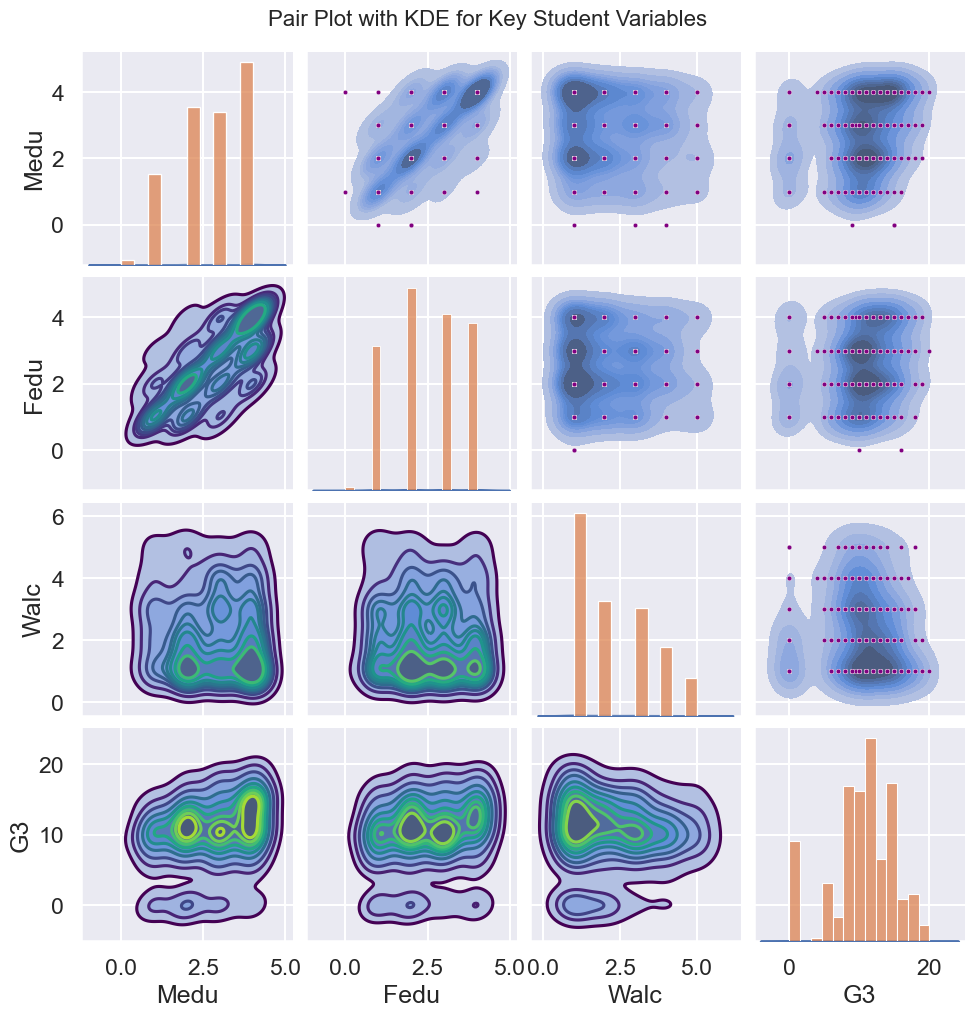

In [26]:

subset_vars = ['Medu', 'Fedu', 'Walc', 'G3']

# Set seaborn style and context
sns.set(style="darkgrid", context="talk")

# Create the pair plot with KDE plots
g = sns.pairplot(df[subset_vars], diag_kind='kde', kind='kde', plot_kws={'shade': True})

# Customize the appearance of the pair plot
g.fig.suptitle('Pair Plot with KDE for Key Student Variables', size=16, y=1.02)
g.map_upper(sns.scatterplot, s=10, color='purple')
g.map_lower(sns.kdeplot, cmap="viridis")
g.map_diag(sns.histplot, kde_kws={'color': 'blue'})

plt.show()

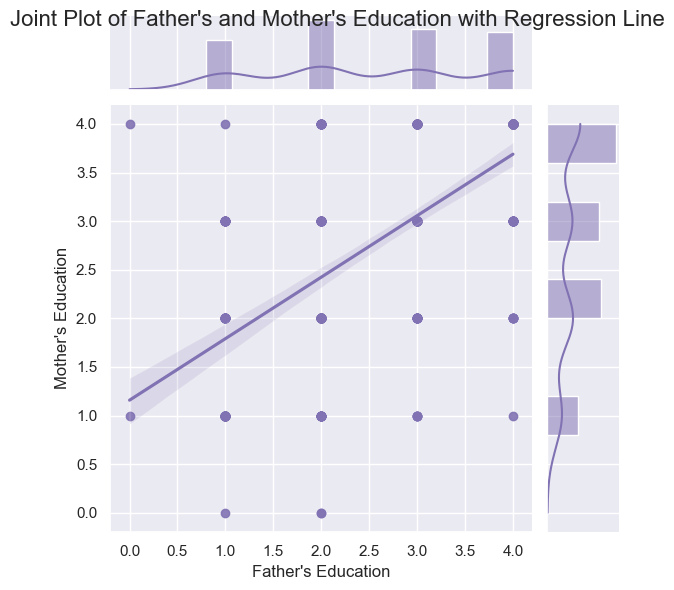

In [27]:
# Set seaborn style
sns.set_theme(style="darkgrid")

# Create a joint plot for 'Fedu' and 'Medu' with a regression line
g = sns.jointplot(x="Fedu", y="Medu", data=df_encoded,
                  kind="reg",  # Scatter plot with regression line
                  color="m", height=6,
                  scatter_kws={'alpha': 0.9})  # Adjust scatter plot transparency

# Customize the appearance of the plot
g.set_axis_labels('Father\'s Education', 'Mother\'s Education')
g.fig.suptitle('Joint Plot of Father\'s and Mother\'s Education with Regression Line', size=16)

plt.show()


### 8. Comment mother's job / father's job / guardian
The first highlight is the correlation between the parents educations. Then regarding the parents education and the grades, there is a slight tendency towargs higher grades.

## Pair Plot KDE: failures vs Gs

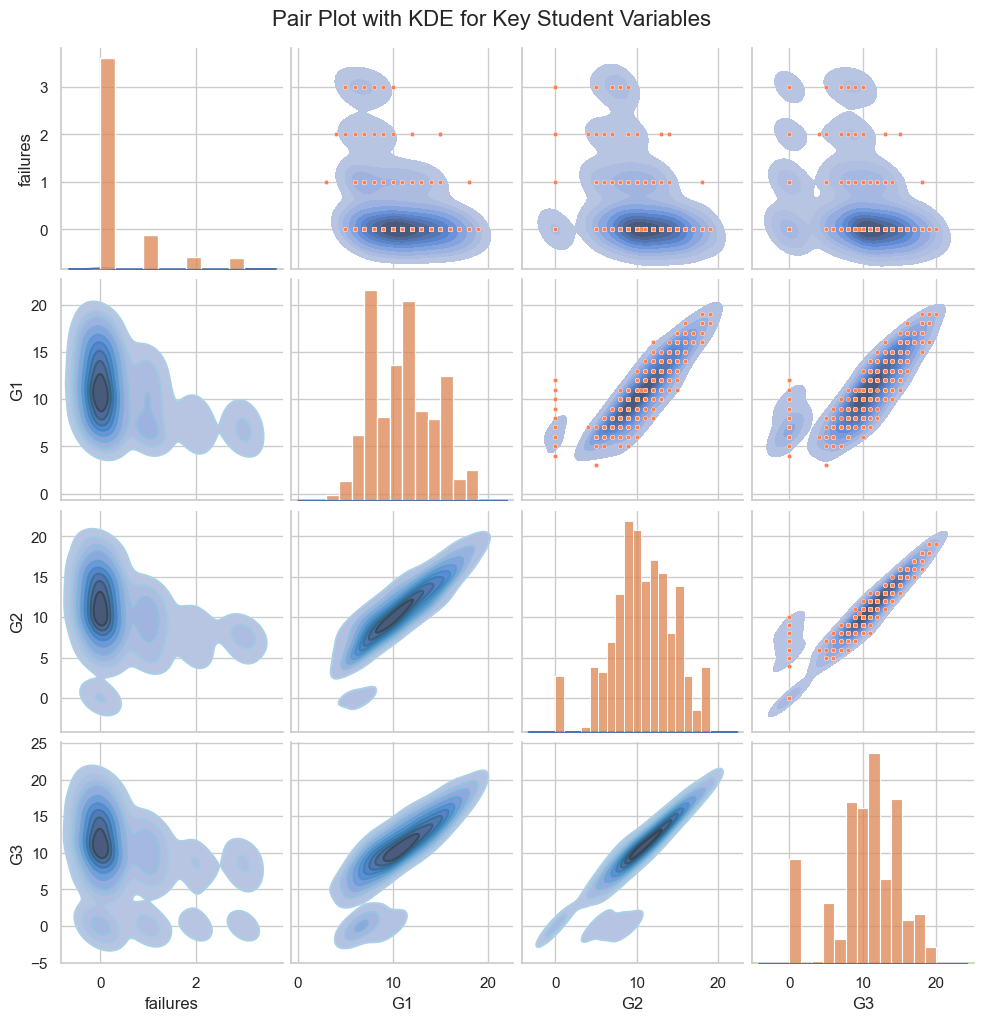

In [28]:

subset_vars = ['failures', 'G1', 'G2', 'G3']

# Set seaborn style and context
sns.set(style="whitegrid", context="notebook")

# Create the pair plot with KDE plots
g = sns.pairplot(df[subset_vars], diag_kind='kde', kind='kde', plot_kws={'shade': True})

# Customize the appearance of the pair plot
g.fig.suptitle('Pair Plot with KDE for Key Student Variables', size=16, y=1.02)
g.map_upper(sns.scatterplot, s=10, color='coral')
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.histplot, kde_kws={'color': 'k'})

# Show the plot
plt.show()

### 9. Comment failures vs Gs
In this pairplot we can clearly see the correlation between the progression of the gredes, they are pretty correlated. Also there is a slight tendency on the students that don't attend at class, specially on the last exams.

# EDA Summary of Student Data

## Key Findings

### Primay

1. **Alcohol Consumption**
   - Strong positive correlation between weekday and weekend alcohol consumption.
   - More study time correlates with less weekend alcohol consumption.

2. **Parental Education**
   - Close relationship between mother's and father's education levels.
   - Higher parental education slightly correlates with better student grades.

3. **Student Performance**
   - High consistency in grades across different terms.
   - More past failures are associated with lower final grades.

4. **Travel Time and Grades**
   - Longer travel times to school mildly associated with lower final grades.

5. **Rural/Urban Divide**
   - Urban students have slightly higher average grades compared to rural students.

6. **Study Time**
   - More study hours generally correlate with better grades, especially around 2 hours of study time.


### Secondary


7. **Gender Differences**
   - No significant grade differences between genders, but male students' grades are more varied.

8. **Alcohol Consumption vs Grades**
   - Weekend alcohol consumption does not drastically impact grades; average performance is maintained.

9. **Social Life and Travel**
   - Frequent socializing and alcohol consumption do not significantly affect academic performance.

10. **Parental Factors**
   - Diversity in parental jobs, with mothers often being primary guardians.
   - Parental occupation's influence on student performance is unclear.

11. **Class Attendance and Performance**
   - Poor class attendance, especially during final exams, correlates with lower grades.

## Conclusion

The EDA reveals important relationships between students' lifestyle, parental background, and academic performance, indicating that while personal and familial factors have an influence, most students maintain an average performance level.


In [29]:
# Save the DataFrame to a CSV file,  for later modelling
df_encoded.to_csv('processed_dataset.csv', index=False)

# Checking is done right
df_check = pd.read_csv('processed_dataset.csv')
print(df_check.head())


   school  sex  address  famsize  Pstatus  age  Dalc  Walc  health  absences  \
0       1    0        0        1        0   18     1     1       5        75   
1       1    0        0        1        0   19     1     2       5        12   
2       1    0        0        1        0   17     2     3       2         4   
3       1    0        0        1        1   19     1     1       3        40   
4       1    0        0        1        1   18     1     1       4         0   

   ...  Fjob_other  Fjob_services  Fjob_teacher  reason_course  reason_home  \
0  ...           0              1             0              0            1   
1  ...           0              0             0              0            1   
2  ...           1              0             0              0            1   
3  ...           1              0             0              0            0   
4  ...           1              0             0              1            0   

   reason_other  reason_reputation  guardian